# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df=pd.read_csv('Customer_Behaviour.csv')

### View the top 5 rows

In [3]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [8]:
def gen(x):
    if x=='Male':
        return 0
    elif x=='Female':
        return 1
df['gender']=df['Gender'].apply(gen)
df.drop(columns=['Gender'],inplace=True)

In [9]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,gender
0,15624510,19,19000,0,0
1,15810944,35,20000,0,0
2,15668575,26,43000,0,1
3,15603246,27,57000,0,1
4,15804002,19,76000,0,0


#### Drop user ID column

In [10]:
df=df.drop(columns=['User ID'])
df.head()

,Age,EstimatedSalary,Purchased,gender
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

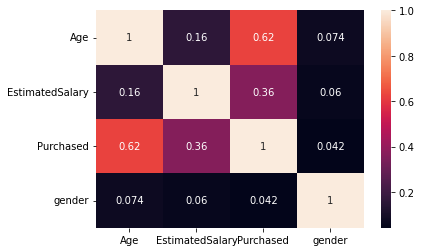

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Plot a countplot of gender with respect to purchased

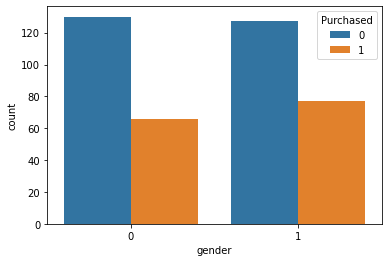

In [12]:
sns.countplot(data=df,x='gender',hue='Purchased')
plt.show()

### Plot a displot of Age

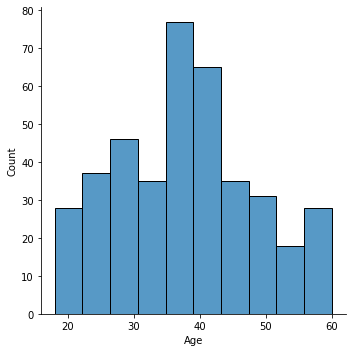

In [13]:
sns.displot(data=df,x='Age')
plt.show()

### Plot pairplot of the dataset

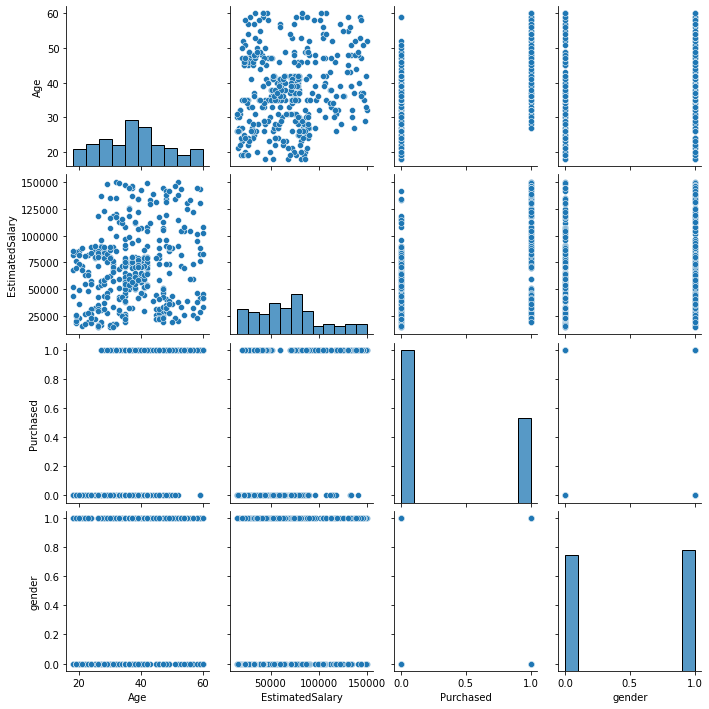

In [14]:
sns.pairplot(df)
plt.show()

## Data Preprocessing

### Split the dataset into input and target variables

In [15]:
X=df.drop(columns=['Purchased'])
y=df['Purchased']
X.head()

,Age,EstimatedSalary,gender
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


### Scale the data using StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scalar=StandardScaler()

In [18]:
X_scaled=scalar.fit_transform(X)

In [19]:
X=pd.DataFrame(X_scaled,columns=X.columns)

In [20]:
X.head()

,Age,EstimatedSalary,gender
0,-1.781797,-1.490046,-1.020204
1,-0.253587,-1.460681,-1.020204
2,-1.113206,-0.785290,0.980196
3,-1.017692,-0.374182,0.980196
4,-1.781797,0.183751,-1.020204


### Split the dataset into training and testing set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100,shuffle=False)

### Check shape of X_train and X_test

In [23]:
X_train.shape

(320, 3)

In [24]:
X_test.shape

(80, 3)

## ML Models

### Logistic Regression Classifier

In [25]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
model=LogisticRegression()

In [27]:
cross_val_score(model,X,y,cv=5,scoring='accuracy')

array([0.7   , 0.95  , 0.9375, 0.8125, 0.7   ])

In [28]:
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
model.score(X_train,y_train)

0.846875

In [30]:
pred=model.predict(X_test)
metrics.accuracy_score(y_test,pred)

0.7375

In [31]:
print('Confusion matrix is ')
print(metrics.confusion_matrix(y_test,pred))
print('Classification report is ')
print(metrics.classification_report(y_test,pred))

Confusion matrix is 
[[28  1]
 [20 31]]
Classification report is 
              precision    recall  f1-score   support

           0       0.58      0.97      0.73        29
           1       0.97      0.61      0.75        51

    accuracy                           0.74        80
   macro avg       0.78      0.79      0.74        80
weighted avg       0.83      0.74      0.74        80



In [32]:
cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()

0.82

### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rmodel=RandomForestClassifier(n_estimators=20)

In [35]:
rmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [36]:
rmodel.score(X_train,y_train)

0.984375

In [37]:
rpred=rmodel.predict(X_test)
metrics.accuracy_score(y_test,rpred)

0.8875

In [38]:
print('Confusion Matrix is')
print(metrics.confusion_matrix(y_test,rpred))

Confusion Matrix is
[[28  1]
 [ 8 43]]


In [39]:
print('Classification report is')
print(metrics.classification_report(y_test,rpred))

Classification report is
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.98      0.84      0.91        51

    accuracy                           0.89        80
   macro avg       0.88      0.90      0.88        80
weighted avg       0.90      0.89      0.89        80



In [40]:
cross_val_score(rmodel,X,y,cv=5,scoring='accuracy').mean()

0.85

### Support Vector Machine

In [41]:
from sklearn.svm import SVC

In [42]:
smodel=SVC()

In [43]:
smodel.fit(X_train,y_train)


SVC()

In [44]:
smodel.score(X_train,y_train)

0.9

In [45]:
spred=smodel.predict(X_test)
print('Confusion Matrix is')
print(metrics.confusion_matrix(y_test,spred))

Confusion Matrix is
[[29  0]
 [ 7 44]]


In [46]:
print('Classification report is')
print(metrics.classification_report(y_test,rpred))

Classification report is
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.98      0.84      0.91        51

    accuracy                           0.89        80
   macro avg       0.88      0.90      0.88        80
weighted avg       0.90      0.89      0.89        80



In [47]:
cross_val_score(smodel,X,y,cv=5,scoring='accuracy').mean()

0.9

### Assign cross val scores of all models into a dataframe

In [48]:
data=[['Random classifer',cross_val_score(rmodel,X,y,cv=5,scoring='accuracy').mean()],
      ['SVM',cross_val_score(smodel,X,y,cv=3,scoring='accuracy').mean()],
       ['Logistic Regression',cross_val_score(model,X,y,cv=3,scoring='accuracy').mean()
      ]]

pd.DataFrame(data,columns=['Model','Score'])

,Model,Score
0,Random classifer,0.845000
1,SVM,0.904949
2,Logistic Regression,0.805072


***

## Deploy the model with highest score using Tkinter

In [49]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [50]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will output to an entry box in Tkinter

In [51]:
def getPrediction():
    age1 = int(age.get())
    salary1 = int(salary.get())
    gender1=gender.get()
        
 
    if gender1 == 'Male':
        gender1=0
    else:
        gender1=1
        
    result=model.predict(scalar.transform([[age1, salary1,gender1]]))
    if result[0] == 1:
        resultbox.insert(0, 'Purchased')
    elif result[0] == 0:
        resultbox.insert(0, 'Not Purchased')
    else:
        resultbox.insert(0, 'Error')

In [52]:
def button_clear():
    resultbox.delete(0, END) 

### Create Tkinter window with all necessary entryboxes and labels

In [53]:
window=Tk()
window.title('Customer Behaviour Classification')
window.geometry("400x400")
window.resizable(0,0)

genderlabel=Label(window,text='Gender').pack()
gender= Combobox(window)
gender['values']=('Male','Female')
gender.current(0)
gender.pack()

Label(window).pack

agelabel=Label(window,text='Age').pack()
age=Entry(window)
age.pack()

Label(window).pack

salarylabel = Label(window, text = 'Estimated Salary').pack()
salary = Entry(window)
salary.pack()

Label(window).pack

button = Button(window, text = 'Get Prediction',command=getPrediction).pack()

resultbox = Entry(window)
resultbox.pack()

buttonClear=Button(window,text="C",command=button_clear)
buttonClear.pack()

window.mainloop()

***

### Save the SVM model

In [54]:
import pickle

In [55]:
file_name='customermodel.sav'

In [56]:
pickle.dump(smodel,open(file_name,'wb'))

Load Saved model

In [57]:
loadmodel=pickle.load(open('customermodel.sav','rb'))

In [58]:
input_data=[0,0,0]
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loadmodel.predict(input_data_reshaped)
print(prediction)

if (prediction==0):
    print("Not purchased")
else:
    print("Purchased")

[0]
Not purchased


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Save the model (standardize)

In [59]:
import pickle

In [60]:
thefile='scaledSVMmodel_.sav'

In [61]:
pickle.dump(scalar,open(thefile,'wb'))

In [62]:
loadthemodel=pickle.load(open('scaledSVMmodel_.sav','rb'))

In [63]:
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

values=scalar.transform(input_data_reshaped)
print(values)

[[-3.59654689 -2.04797851 -1.02020406]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# <span style = "color:green;font-size:40px"> Great Job! </span>

SAVE RANDOM FOREST PREDICTION MODEL

In [64]:
import pickle

In [65]:
filename='trained_model_.sav'

In [66]:
pickle.dump(rmodel,open(filename,'wb'))

In [67]:
RFmodel=pickle.load(open('trained_model_.sav','rb'))

In [68]:
input_data=[1,0,0]
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=RFmodel.predict(input_data_reshaped)
print(prediction)

if (prediction==0):
    print("Not purchased")
else:
    print("Purchased")

[1]
Purchased


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Save the Logistic Regression Model

In [70]:
import pickle

In [71]:
logfile='logisticmodel.sav'

In [72]:
pickle.dump(model,open(logfile,'wb'))

In [75]:
Logmodel=pickle.load(open('logisticmodel.sav','rb'))

In [77]:
input_data=[0,0,0]
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=RFmodel.predict(input_data_reshaped)
print(prediction)

if (prediction==0):
    print("Not purchased")
else:
    print("Purchased")

[0]
Not purchased


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
